In [2]:
# IMPORTING LIBRARIES AND HELPER FUNCTIONS

import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import math

from utils import *
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

%matplotlib inline
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

print('Libraries imported successfully.')

Libraries imported successfully.


In [3]:
# IMPORTING THE DATA

columns = ['year','age','distance','stores','latitude','longitude']
c1 = ['serial','year','age','distance','stores','latitude','longitude','price']

dataFrames = pd.read_csv('data.csv', names = c1)
dataFrames.head()

,serial,year,age,distance,stores,latitude,longitude,price
0,0,2009,21,9,6,84,121,14264
1,1,2007,4,2,3,86,121,12032
2,2,2016,18,3,7,90,120,13560
3,3,2002,13,2,2,80,128,12029
4,4,2014,25,5,8,81,122,14157


In [4]:
# DATA NORMALIZATION

dataFrames1 = dataFrames.iloc[:,1:] #REMOVES 'SERIAL' COLUMN
dataFramesNorm = (dataFrames1 - dataFrames1.mean())/dataFrames1.std() #NORMALIZE THE DATA
dataFramesNorm.head()

,year,age,distance,stores,latitude,longitude,price
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799,0.350088
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799,-1.836486
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456,-0.339584
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803,-1.839425
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141,0.245266


In [5]:
# FUNCTION DEFINITION TO CONVERT NORMALIZED DATA BACK TO UNDERSTANDABLE DATA

yMean = dataFrames['price'].mean()
yStd = dataFrames['price'].std()

def convert(pred):
    return float(pred*yStd + yMean)

#print(convert(0.350088))

In [6]:
# SELECT FEATURES FROM THE DATASET

x = dataFramesNorm.iloc[:,:6]
x.head()

,year,age,distance,stores,latitude,longitude
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141


In [7]:
# SELECT LABELS FROM THE DATASET

y = dataFramesNorm.iloc[:,-1]
y.head()

0    0.350088
1   -1.836486
2   -0.339584
3   -1.839425
4    0.245266
Name: price, dtype: float64

In [8]:
# EXTRACT NUMERIC VALUES OF THE FEATURES AND LABELS

xArr = x.values
yArr = y.values

print('Features array shape =',xArr.shape)
print('Label array shape =',yArr.shape)

Features array shape = (5000, 6)
Label array shape = (5000,)


In [9]:
# SPLIT THE DATA INTO A TRAINING SET AND A TEST SET

xTrain, xTest, yTrain, yTest = train_test_split(xArr,yArr,test_size=0.05,random_state=0)

print('Training set shapes: ',xTrain.shape,yTrain.shape)
print('Test set shapes: ',xTest.shape, yTest.shape)

Training set shapes:  (4750, 6) (4750,)
Test set shapes:  (250, 6) (250,)


In [10]:
# CREATE THE MODEL USING KERAS 

def getModel():
    model = Sequential([
        Dense(10,input_shape=(6,),activation='relu'),
        Dense(20,activation='relu'),
        Dense(5,activation='relu'),
        Dense(1)
        ])
    
    model.compile(loss='mse', optimizer='adam')
    return model

getModel().summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                70        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 105       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [11]:
# TRAIN THE MODEL 

escb = EarlyStopping(monitor="val_loss", patience=5) # EARLY STOPPING FROM KERAS

model = getModel()
untrainedPredictions = model.predict(xTest)

history = model.fit(
    xTrain, yTrain,
    validation_data = (xTest,yTest),
    epochs=100,
    callbacks = [escb])

Epoch 1/100
149/149 [==============================] - 0s 1ms/step - loss: 0.6260 - val_loss: 0.2603
Epoch 2/100
149/149 [==============================] - 0s 562us/step - loss: 0.2303 - val_loss: 0.1780
Epoch 3/100
149/149 [==============================] - 0s 509us/step - loss: 0.1819 - val_loss: 0.1648
Epoch 4/100
149/149 [==============================] - 0s 534us/step - loss: 0.1698 - val_loss: 0.1591
Epoch 5/100
149/149 [==============================] - 0s 694us/step - loss: 0.1650 - val_loss: 0.1547
Epoch 6/100
149/149 [==============================] - 0s 669us/step - loss: 0.1620 - val_loss: 0.1508
Epoch 7/100
149/149 [==============================] - 0s 502us/step - loss: 0.1597 - val_loss: 0.1521
Epoch 8/100
149/149 [==============================] - 0s 515us/step - loss: 0.1586 - val_loss: 0.1534
Epoch 9/100
149/149 [==============================] - 0s 515us/step - loss: 0.1575 - val_loss: 0.1499
Epoch 10/100
149/149 [==============================] - 0s 644us/step - los

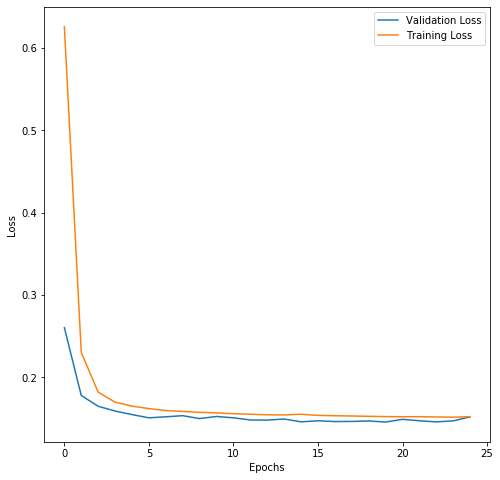

In [12]:
# PLOT THE TRAINNING AND VALIDATION LOSS

plot_loss(history)

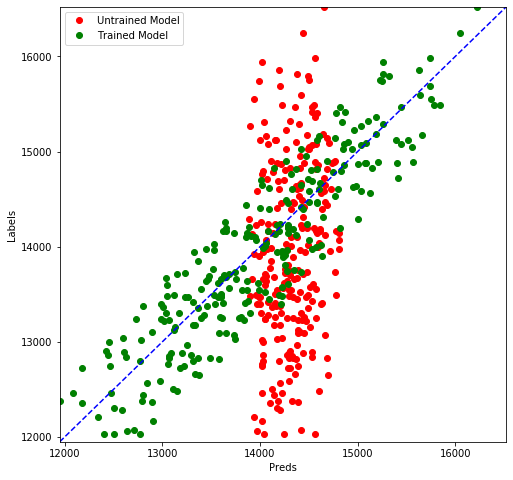

In [13]:
# PLOT THE PRICE PREDICTIONS OVER THE TEST SET

trainedPredictions = model.predict(xTest)
untrainedPrice = [convert(y) for y in untrainedPredictions]
trainedPrice = [convert(y) for y in trainedPredictions]
testPrice = [convert(y) for y in yTest]

compare_predictions(untrainedPrice,trainedPrice,testPrice)

In [14]:
# UNKNOWN DATA

mc = pd.read_csv('myCases.csv', names = columns)
mc.head()

,year,age,distance,stores,latitude,longitude
0,2020,10,10,10,90,100
1,2021,3,8,11,100,90
2,2022,7,12,8,90,100


In [15]:
# SETTING UP THE UNKNOWN DATA

mc = dataFrames1.append(mc, ignore_index=True).iloc[:,:6] # ADD THE UNKNOWN DATA TO THE KNOWN DATA FOR BETTER NORMALIZATON
norm = (mc - mc.mean())/mc.std() # NORMALIZE THE DATA
norm = norm.iloc[5000:,:] # EXTRACT THE UNKNOWN DATA IN NORMALIZED FORM

In [16]:
# PRICE PREDICTIONS FOR UNKNOWN DATA

myCasePrediction = model.predict(norm)
predictions = [convert(y) for y in myCasePrediction]
print(predictions)

[14239.87109375, 13937.6962890625, 14287.74609375]
